# Predicting Financial Fraud of Firms
## Introduction

Firms report financial statements for every quarter and annual period. These statements are first reported internally by the organization, which in turn must be audited by accredited auditing firms to verify that the reports are accurate. Firms may be incentivized to create fraud within their reports for financial benefits such as taxation and value inflation. Thus, the paper and data report the findings when an external auditing firm runs various methods such as F Measures, Type l-ll errors, and Correlation Coefficients to detect fraud.

Our project will try to determine if selected variables can form a model to accurately predict whether or not a firm is fraudulent.

The question we want to answer is: <strong>Can we accurately predict if a financial firm is fraudulent or not based on its [...]?</strong>

The dataset that will be used to answer this question is Audit Data. Audit Data contains risk factor classifications and methods used by the external auditing firm. Specifically, the data contains reports from 777 firms from 46 different listings and 14 different sector scores. The numeric variables in this dataset are:

<ol>
    <li>Para A : Discrepancy in planned spending in Indian Rupees (in crore)</li>
    <li>Para B : Discrepancy in unplanned spending in Indian Rupees (in crore)</li>
    <li>Total : Sum of discrepancies in Para A and Para B and other reports in Indian Rupees (in crore)</li>
    <li>Number : Historical Discrepancy Score (non-measured)</li>
    <li>Money Value : Amount of money involved in misstatements</li>
    <li>Sector : Historical risk score (non-measured)</li>
    <li>Loss : Monetary loss suffered by a firm in the last year</li>
    <li>History : Average monetary loss by a firm in the last 10 years</li>
    <li>District Score : Risk score of district in last 10 years (non-measured)</li>
</ol>

Some variables were not included because they were enumerations (eg. Audit ID) or calculated risk values (eg. ARS or Risk, our predicted variable).

## Methods

### Choosing Our Predictor Variables

Out of the variables listed, we should not consider District Score, Number, and Sector Score. These values were calculated by analysis of the other variables. It would not make sense to include them because these values are not created when an inspector visits a firm. To make the model more useful, we should use only variables that can be determined from inspection, audits, or historical audits and inspections.

Now that we have ruled out two variables, we are left with Para A and B, Total, Money Value, Loss, and History. When inspecting Para A, Para B, and Total, they all represent discrepancies in reported spending vs audited spending. Discrepancies in reported vs audited spending would be extremely valuable to determine if a firm is fraudulent because false reporting of money spending would likely indicate suspicious activity. Hence, we should include a variable that describes discrepancy in spending. Since Total includes Para A, Para B, and other discrepancies, it makes more sense to only include Total and remove Para A and Para B as predictor variables.

The other variables to choose from are Money Value, Loss, and History. Loss and History both describe a similar measurement: historical monetary loss. This could be valuable to our analysis because a fraudulent firm would likely suffer losses.

# [...] above [explain why History and Loss are important and why we chose History over Loss]

# [...] below

These are the variables that we will use to create our KNN classification model:

<strong>1. History (Average historical loss suffered by the firm in the last 10 years)</strong>

The history variable seems like a relevant variable to predict fraud since we predict there must be a correlation between the tendency to commit fraud and the financial health of a firm. Meaning that underperforming firms must be more desperate and inclined for fraudulent reporting. 

<strong>2. Total (Total amount of discrepancy found in other reports Rs (in crore))</strong>

The total discrepancy is an obvious variable which we intend to use. Since high discrepancies indicate inaccuracies, this must naturally lead to more fraudulent reports.

<strong>3. Money Value (Amount of money involved in misstatements in the past audit)</strong>

The last variable, money value, is also closely linked to the Total variable. We assume that higher amounts of misstatements suggest suspicious activity from a firm. Hence, they will be more likely to commit fraudulent activity.

<strong>4. Risk (the predicted variable)</strong>

Risk is 0 if the firm has been determined to be non-fraudulent, and 1 if the firm has been determined to be fraudulent.

In order to answer our question, we will create an initial KNN model with our three predictor variables which we will use in a cross-validation in order to determine an optimum value of K for the model. Then we will use this value of K to create our final model. Finally, we will use the testing data to test how accurate our model is at classifying observations it has not seen.

## Wrangling and Exploring the Data

First, we load the libraries that we need, which are tidyverse, tidymodels, repr, and GGally.

In [ ]:
library(tidyverse)
library(tidymodels)
library(repr)
library(GGally)

Now we want to download the data from the url. Since it is in .zip format, we have to download it before unzipping and then using read_csv(). The file "audit_risk.csv" is the one with the data that we want to use to create our classification.

In [22]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip"
download.file(url, "audit_data.zip")
unzip("audit_data.zip")

audit_risk_data_main <- read_csv("audit_data/audit_risk.csv")

head(audit_risk_data_main, 3) ### show the first 3 rows of the data to see if it is tidy.

Warning message:
“Duplicated column names deduplicated: 'Score_B' => 'Score_B_1' [11]”
Parsed with column specification:
cols(
  .default = col_double(),
  LOCATION_ID = col_character()
)

See spec(...) for full column specifications.



Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0


We are determining risk through classification, so the column type needs to be converted to a factor.

The data appears to be tidy. Each column is one variable, each row is one observation, and each cell has exactly one value. However, there are a bunch of variables irrelevant to our analysis so we will select them out.

# TO DO : ADD PORTION ABOUT FILTERING OUT NA AND ALSO HOW MANY ROWS HAVE NA

In [67]:
audit_risk_data_select <- mutate(audit_risk_data_main, Risk = as_factor(Risk)) %>%
select(History, TOTAL, Money_Value, Risk)

head(audit_risk_data_select, 3) ### Show the first 3 rows to show that we have kept the correct columns and nothing got messed up after we filtered.

History,TOTAL,Money_Value,Risk
<dbl>,<dbl>,<dbl>,<fct>
0,6.68,3.38,1
0,4.83,0.94,0
0,0.74,0.00,0


Now that the dataset has been loaded and it is in the form that we want, we can separate it into the training and testing data sets. We set the seed so the split is the same everytime and then use initial_split to perform the split. Then we extract each respective data set into a training data set and a testing data set.

In [54]:
### SET THE SEED
set.seed(18)
### DO NOT CHANGE

audit_risk_data_split <- initial_split(audit_risk_data_select, prop = 2/3, strata = Risk)
audit_risk_data_training <- training(audit_risk_data_split)
audit_risk_data_testing <- testing(audit_risk_data_split)

## Visualizing the Training Data

We should examine the data to see possible trends. We will remove Risk from the data set because we only want to explore the predictor variables and then calculate the mean, median, standard deviation, min, and max to get a general sense of the numbers.

In [55]:
audit_risk_data_training_predictors <- select(audit_risk_data_training, History, TOTAL, Money_Value) ### Select the predictors only

### Now we can calculate the mean, median, min, and max and combine them all into one tibble.

audit_risk_data_training_mean <- audit_risk_data_training_predictors %>%
map_df(mean, na.rm = TRUE) %>%
mutate(Stat = "mean")

audit_risk_data_training_max <- audit_risk_data_training_predictors %>%
map_df(max, na.rm = TRUE) %>%
mutate(Stat = "max")

audit_risk_data_training_min <- audit_risk_data_training_predictors %>%
map_df(min, na.rm = TRUE) %>%
mutate(Stat = "min")

audit_risk_data_training_median <- audit_risk_data_training_predictors %>%
map_df(median, na.rm = TRUE) %>%
mutate(Stat = "median")

audit_risk_data_training_stdev <- audit_risk_data_training_predictors %>%
map_df(sd, na.rm = TRUE) %>%
mutate(Stat = "stdev")

audit_risk_data_training_stats <- bind_rows(audit_risk_data_training_max, audit_risk_data_training_mean,
                                            audit_risk_data_training_min, audit_risk_data_training_median,
                                            audit_risk_data_training_stdev)

audit_risk_data_training_stats

History,TOTAL,Money_Value,Stat
<dbl>,<dbl>,<dbl>,<chr>
9.0000000,1268.91000,935.03000,max
0.1100386,13.95441,16.54841,mean
0.0000000,0.00000,0.00000,min
0.0000000,1.33500,0.11500,median
0.5505893,60.34534,79.30013,stdev


### Analyzing the table

In our table, the max values are very large in comparison to the mean and median.

When comparing the mean to the median, we notice that they are quite far apart. This could indicate that there are not many fraudulent bodies but there are some at the top with very large Money_Value and TOTAL values that raise the mean but do not affect the median by much.

The min indicates that every value can be exactly zero.

<strong>In addition to calculating those stats, we should see how many observations have risk factors of 0 or 1, as well as the total observations.</strong>

In [56]:
audit_risk_data_count <- audit_risk_data_training %>%
group_by(Risk) %>%
summarize(n = n())

audit_risk_data_count

`summarise()` ungrouping output (override with `.groups` argument)



Risk,n
<fct>,<int>
0,314
1,204


There seems to about an even split, which is good because it will provide us with enough samples of each to accurately predict the Risk. The total number of observations in our training data is 518. This should be sufficient to be accurate.

### Creating a Plot

Based on the stats of the previous table, we could plot TOTAL against Money_Value to see if they are correlated. When inspecting the mean/median/stdev table, they appear to have some degree of correlation. It is less clear if History has a correlation with them, but we can plot all three of our predictor variables against each other in a ggpairs matrix in order to examine any possible correlation. Also, we can check the distributions of each variable in the ggpairs plot.

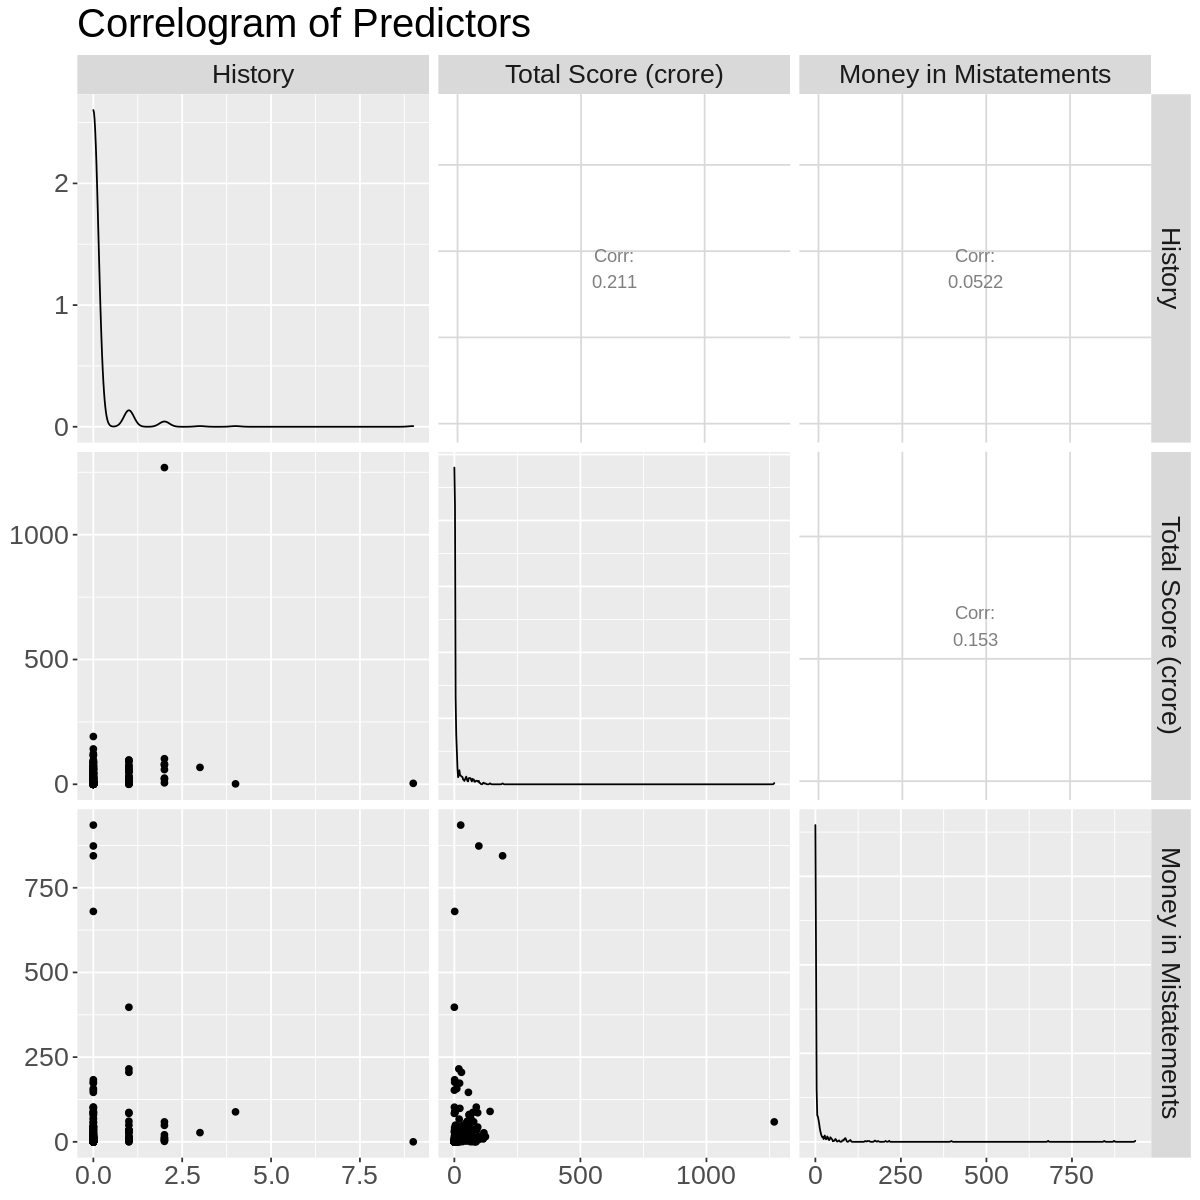

In [57]:
options(repr.plot.width=10, repr.plot.height=10)

audit_risk_data_pairs <- audit_risk_data_training_predictors %>%
ggpairs(columnLabels = c("History", "Total Score (crore)", "Money in Mistatements")) +
theme(text = element_text(size = 20)) +
ggtitle("Correlogram of Predictors")

audit_risk_data_pairs

First, when we look at the correlation values, two have a very weak positive correlation. The correlation between History and TOTAL is the strongest out of the three, but it is still rather weak. History and Money_Value have almost no correlation at all.

When looking at the distributions, they all have very high peaks near 0 and then quickly drop off as the bin numbers increase. This could be an issue if there are not enough neighbors with higher magnitude of predictor variable values to look at during knn classification. However, the ratio of Risk = 0 to Risk = 1 is about 1:1 so there should be enough to do a proper knn classification.

The scatterplots are really hard to read. The History-Total plot and History-Money plot have odd pillars which could indicate that History score is quantized. The Score-Money plot appears to have one outlier which makes the plot extremely difficult to read. When looking at the plots it doesn't appear that any strong correlation can be interpreted, which matches our observations about the Pearson coeff.

## Creating the model

We will use K nearest neighbours classification from tidymodels in order to create our classification model. Firstly, we have to find an optimum value of K by cross validation for each K from 1 to 50. To do this we will create a KNN spec that uses tune to create the neighbors and set the engine to KNN and the mode to classification:

In [58]:
audit_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
set_engine("kknn") %>%
set_mode("classification")

Now we will create a recipe for our data. The predicted variable is Risk and the predictors are the other variables. So we put that as the first argument of recipe(). We should standardize the data because the scales for the variables are very different. For example, History is on a scale from about 0 to ~9, while TOTAL is on a scale of 0 to ~1260. If we did not standardize, then History would have barely any effect because both the other predictors would have a substantially larger effect on the outcome of the classification. Hence, we add the steps center and scale to the recipe.

In [59]:
audit_training <- audit_risk_data_training %>%
select(Risk, History, TOTAL, Money_Value)

audit_training_recipe <- recipe(Risk ~ ., audit_training) %>%
step_center(all_predictors()) %>%
step_scale(all_predictors())

Our final step before we combine these steps into a workflow is to create the vfold_cv object. We will use 5 folds and k values from 1 to 50. The range for k was arbitrarily chosen. If our visualization for the accuracies of various k's shows that there may lie an optimum value of k past 50, then we would have to retry with some larger values of k.

In [60]:
gridvals <- tibble(neighbors = 1:50)
audit_vfold <- vfold_cv(audit_training, C = 5, strata = Risk)

Finally we can combine the spec, recipe, and vfold_cv object in order to do a 5 fold cross validation. Then we will collect the metrics for each K value from 1 to 50 and order them by the accuracy to find the K with the highest accuracy.

First, we will combine the model and the recipe we created. Then we will use tune_grid() to perform the cross validation for all K values 1 to 50. Before using tune_grid() we should set the seed so that it will be reproducible.

In [61]:
set.seed(1015)

audit_training_fit <- workflow() %>%
add_model(audit_knn_spec) %>%
add_recipe(audit_training_recipe) %>%
tune_grid(resamples = audit_vfold, grid = gridvals)

Now we can collect the metrics and then keep only rows that have the metric as accuracy. We will plot the accuracy vs the values of K in order to visually determine which K has the highest accuracy. 

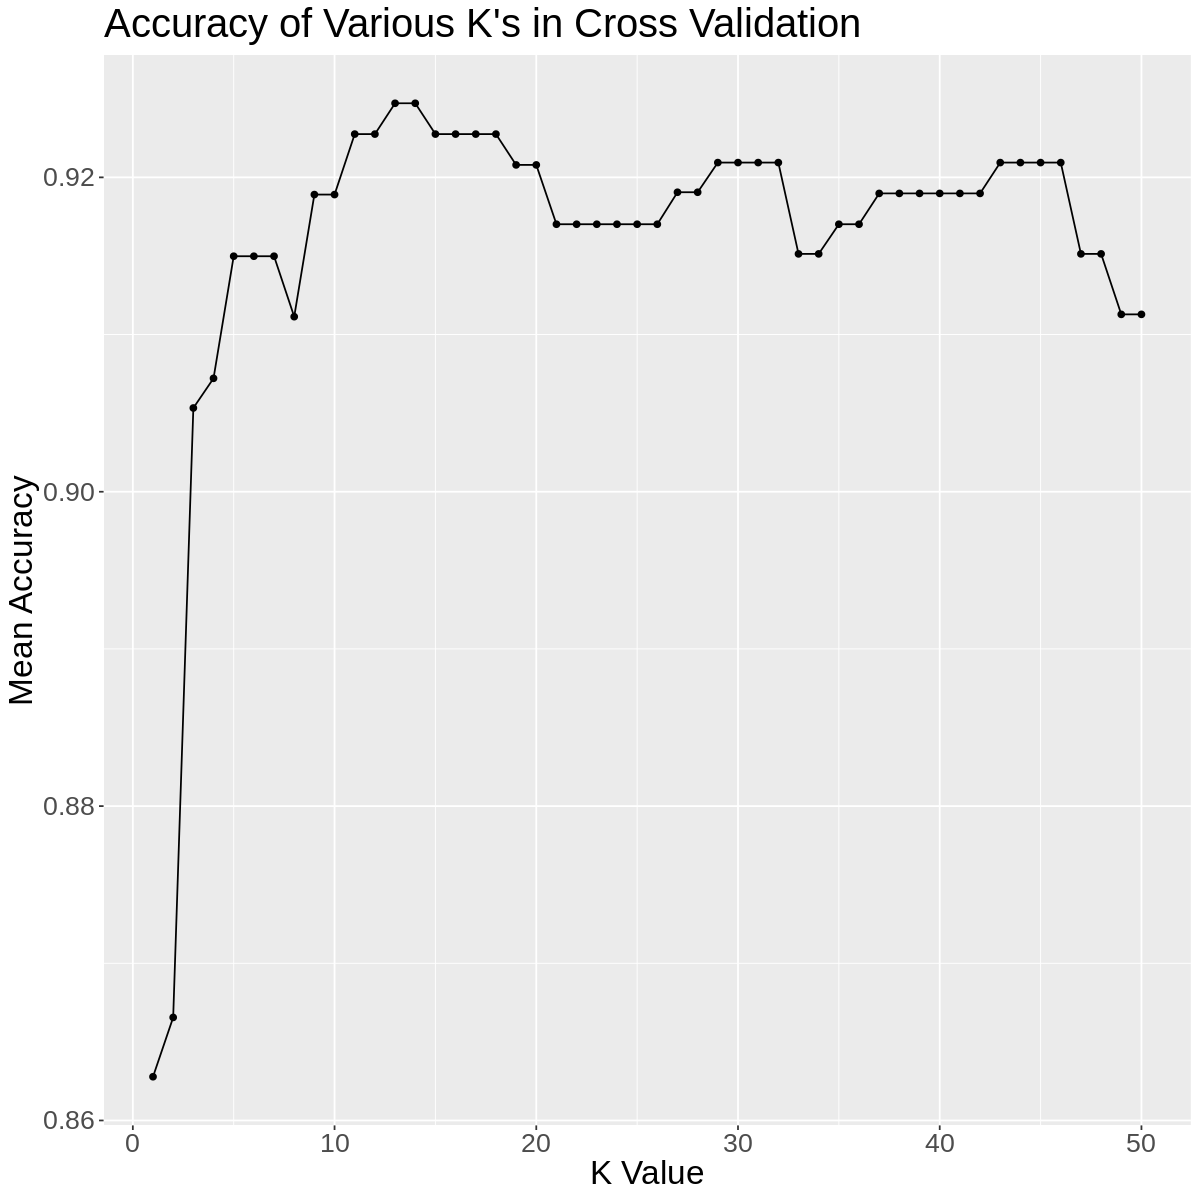

In [62]:
audit_training_metrics <- collect_metrics(audit_training_fit) %>%
filter(.metric == "accuracy")

audit_training_k_plot <- audit_training_metrics %>%
ggplot(aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "K Value", y = "Mean Accuracy") +
theme(text = element_text(size = 20)) +
ggtitle("Accuracy of Various K's in Cross Validation")

audit_training_k_plot

Judging from the graph, it appears that we have an optimum K value around 13. However, we should still pick the K with the highest accuracy by sorting the metrics by accuracy descending and then pulling the K value from the head of the data set.

In [64]:
audit_final_k <- audit_training_metrics %>%
arrange(desc(mean)) %>%
select(neighbors) %>%
head(1) %>%
pull()

paste("Final K Value: ", audit_final_k)
audit_final_k_acc <- audit_training_metrics %>%
filter(neighbors == audit_final_k) %>%
select(mean) %>%
pull()

paste("Accuracy: ", audit_final_k_acc)

[1] "Final K Value:  13"

[1] "Accuracy:  0.924713281539031"

We arrive at a K value of 13 with an accuracy of around 92.5%, which is fairly high. Since we used cross validation to determine our K and test our model for K=5, we should have a similar accuracy value for the testing data. Next, we will create our model using the determined K value.

The model and recipe from earlier are combined together, and then the model is fit onto the training data, creating our final fit that we can use to predict the Risk factor.

In [65]:
audit_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = audit_final_k) %>%
set_engine("kknn") %>%
set_mode("classification")

audit_final_fit <- workflow() %>%
add_recipe(audit_training_recipe) %>%
add_model(audit_final_spec) %>%
fit(data = audit_training)

## Outcomes and Significance

[...]